In [89]:
import os
import urllib
import tarfile
import pandas as pd
import numpy as np
from zlib import crc32
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DOWNLOAD_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_PATH + os.path.join(HOUSING_PATH, "housing.tgz")

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz_file = tarfile.open(tgz_path)
    housing_tgz_file.extractall(path=housing_path)
    housing_tgz_file.close()

fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head(n=6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


### Here we have a total of 20640 instances...
<p>under the total_bedrooms field we have around 20,433 non-null values <br>
    that means there are total of 207 missing values
</p>

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### here ocean_proximity is an object thus can hold any values

<p>using values_count() we can observe the total number of repetitive values counted so far</p>

In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


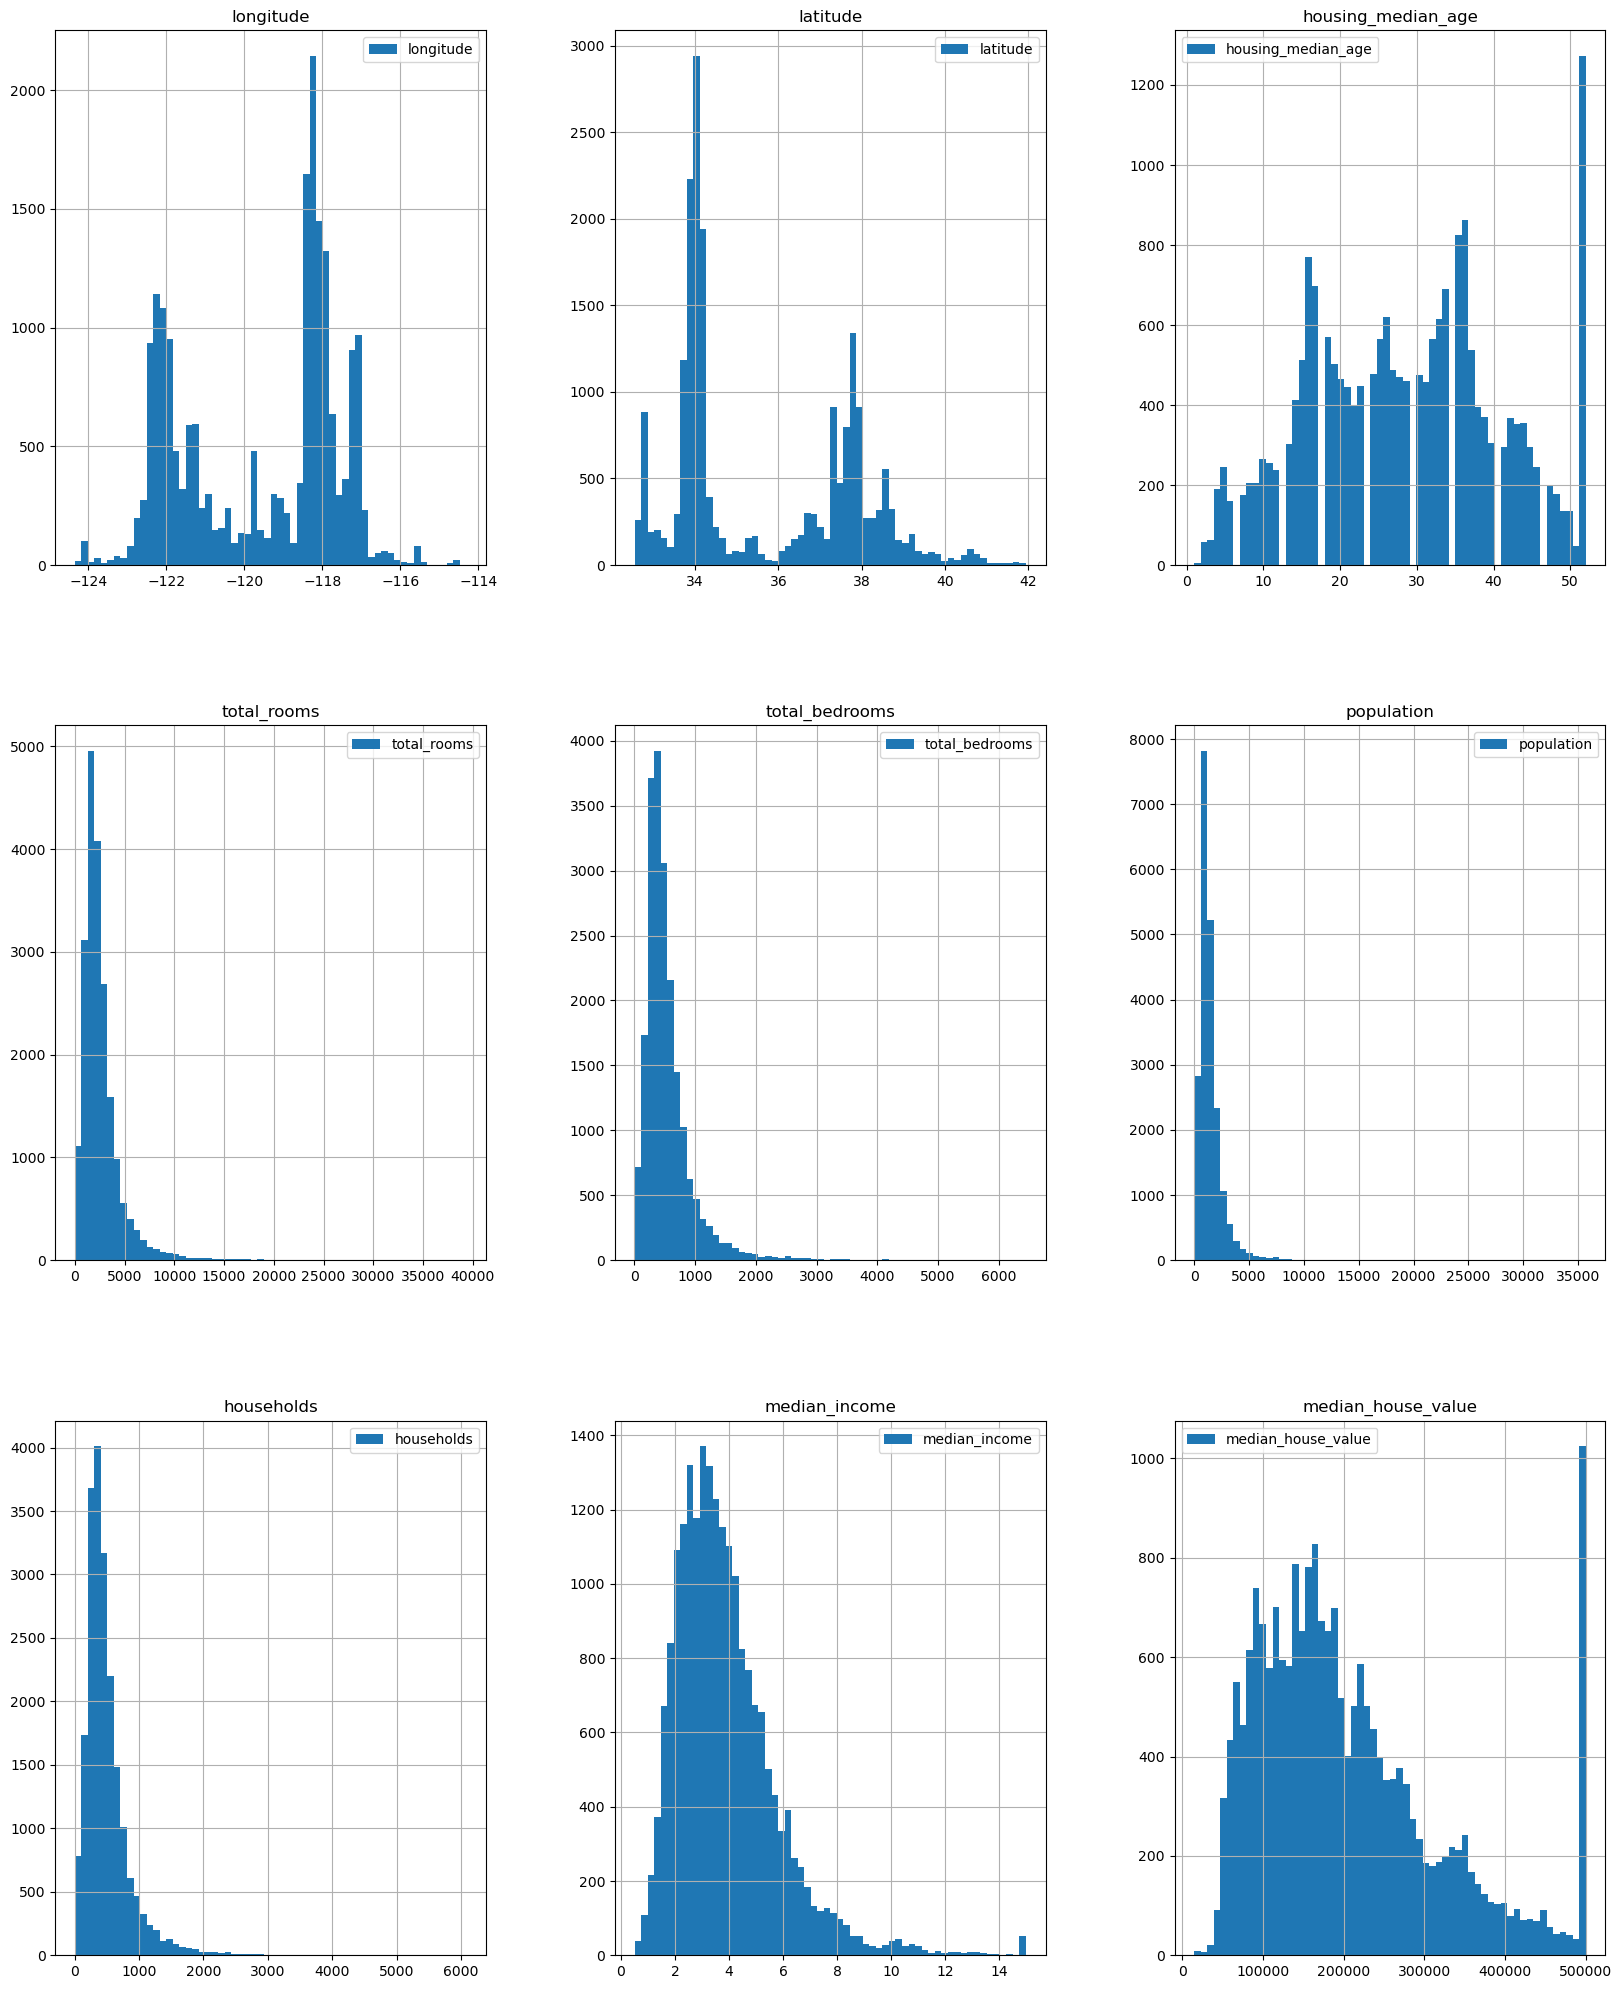

In [9]:
housing.hist(legend=True, figsize=(20, 25), bins=60)
plt.show()

# Splitting into train test sets

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
print(len(train_set))
print(len(test_set))

16512
4128


## Stratified Shuffle Split

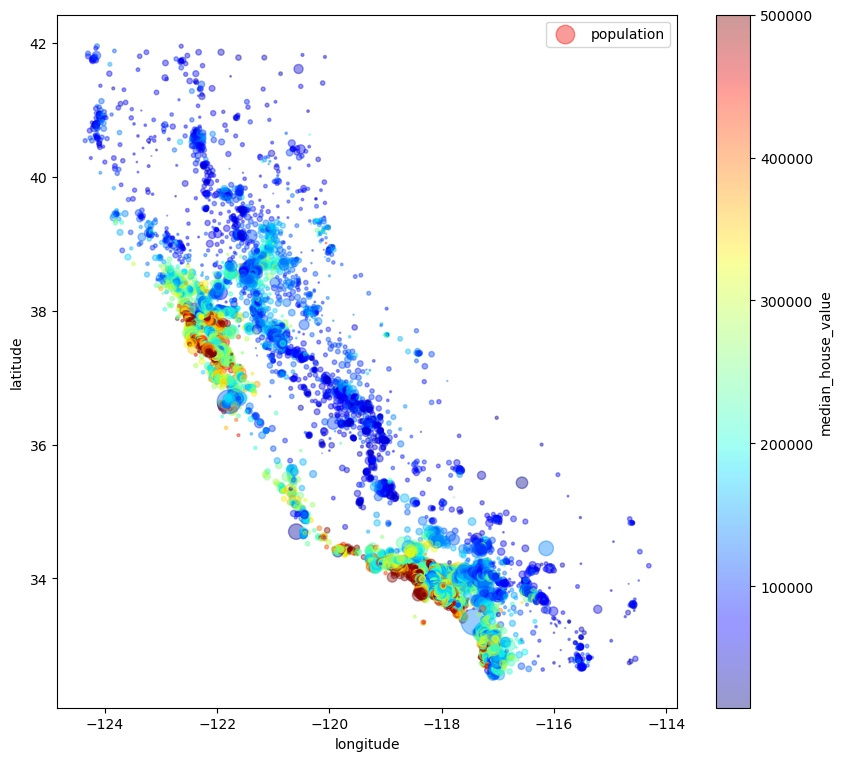

In [43]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.4, colorbar=True, figsize=(10, 9), label='population',
             cmap=plt.get_cmap('jet'), c = 'median_house_value',  s=housing["population"]/100,
)
plt.legend()

## For correlations

### Using standard correlation coefficient - Pearson's r

``` Using the corr() ```

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>]],
      dtype=object)

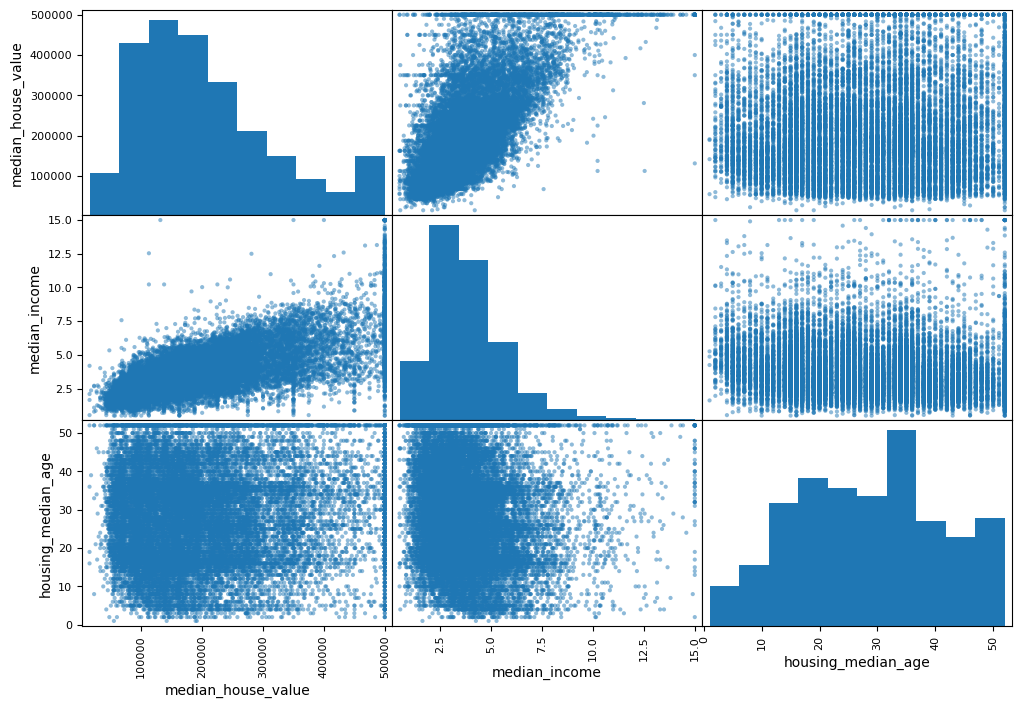

In [47]:
# or can use scatter Matrix

attributes = ["median_house_value", "median_income", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

# The most promising attribute is median_income for predicting the median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

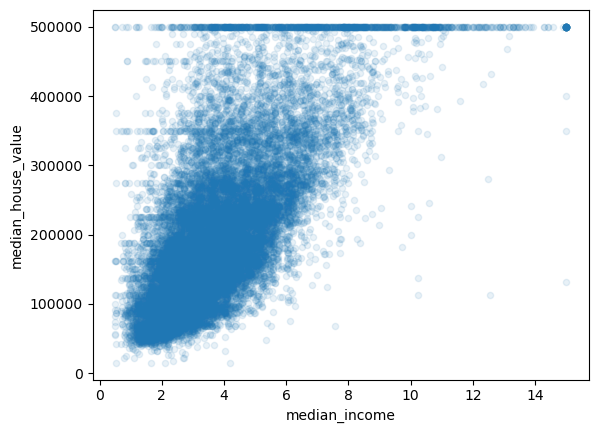

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### We may want to remove those corresponding districts to prevent our algorithm from learning to reproduce these data quirks

### Data quirks around \$500,000 horizontal line, similarly at \$450,000, \$350,000

In [58]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [59]:
num_vals_only = housing.select_dtypes(include=(np.number))
corr_matrix = num_vals_only.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [60]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

<Axes: >

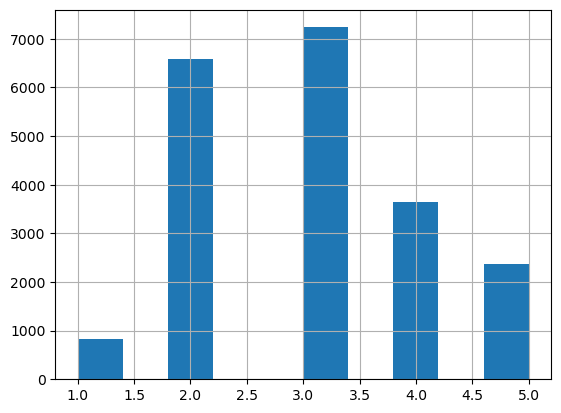

In [61]:
housing['income_cat'].hist()

In [64]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [66]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [67]:
# removing income_cat
for jc in (strat_train_set, strat_test_set):
    jc.drop("income_cat", axis=1, inplace=True)

In [69]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


# Cleaning the data

In [70]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### using the median value we are filling the missing values on the training set and use it to fill the missing values in the training set

<p>also we need the median value as we are going to later replace the missing values in the test set as well</p>

In [76]:
median = housing["total_bedrooms"].median()
print(median) 
housing["total_bedrooms"].fillna(median, inplace=True)

433.0


### using SimpleImputer from sklearn we can take care of the missing values

In [77]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # need to make the instance of the simpleImputer before using it

In [79]:
# since ocean proximity is a text based field we need to create a copy of the data without the text attribute

housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  rooms

In [75]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [80]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

## use this trained imputer to transform the training set by replacing the missing values with learned medians

In [81]:
X = imputer.transform(housing_num)

### handling the textual data part

In [82]:
housing_category = housing[["ocean_proximity"]]

In [83]:
housing_category.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


# using scikit learn OrdinalEncoder we can convert these categories from text to numbers

In [86]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() # creating the instance of the class
housing_category_encoded = ordinal_encoder.fit_transform(housing_category)
housing_category_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [87]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### the issue here is that the ML algo will assume that two nearby values are more similiar than two distant values. 
### for example here category having <1H OCEAN and NEAR OCEAN are more similiar than <1H OCEAN and INLAND

<p>
    to fix this type of issues, a common solution is to create one binary attribute per category
    <br>
    that is one attribute equal to 1 when the category is "<1H OCEAN" and 0 otherwise
    <br>
    another attribute equal to 1 when the cateory is "INLAND" and 0 otherwise
</p>

<hr>

# One-hot encoding

### as only one attribute will be equal to 1 (hot) while the other will be 0 (cold)

<P>new attributes are sometimes called as <em>dummy attribute</em></P>


## OneHotEncoder class converts categorical values into one-hot vectors

In [90]:
categorical_encoder = OneHotEncoder()

In [91]:
housing_category_OneHot = categorical_encoder.fit_transform(housing_category)
housing_category_OneHot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [92]:
housing_category_OneHot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [93]:
categorical_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling

### ML algortihm dont perform well when the input numerical attributes have very different scales.
### for housing data: the total number of rooms ranges from 6 to 39,320 while the median incomes only ranges from 0 to 15 

## Two common ways to get all attributes to have the same scale:

<ul>
    <li>Min-Max Scaling</li>
    <li>Standardization</li>
</ul>

## Min-Max Scaling: (Normalization) 

<p>Here the values are shifted and rescaled so that they end up ranging from 0 to 1<br></p>
<p>we perform this by subtracting the min value and dividing by the (max-min)</p>

### scikit learn provides a transformer called MinMaxScaler

```feature_range``` hyperparameter that lets you change the range if you dont like [0, 1]

<hr>

## Standardization

First it subtracts the mean value (so standardized values always have a zero mean) then it divides by the standard deviation thus result distribution has unit variance
<br>

<p>standardization does not bound values to a specific range, which maybe a problem for some algorithm (like neural networks often expecting an input value range from 0 to 1)</p>

scikit learn provides a transformer called as ```StandardScaler``` for Standardization

# Transformation Pipelines

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [104]:
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.01739526  0.00622264
  -0.12112176]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.56925554 -0.04081077
  -0.81086696]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.01802432 -0.07537122
  -0.33827252]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.5092404  -0.03743619
   0.32286937]
 [-1.56080303  1.2492109  -1.1653327  ...  0.32814891 -0.05915604
  -0.45702273]
 [-1.28105026  2.02567448 -0.13148926 ...  0.01407228  0.00657083
  -0.12169672]]


In [105]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [106]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Train the model

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [108]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [110]:
someData = housing.iloc[:5]
print(someData)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  \
12655      2237.0       706.0         2.1736          INLAND   
15502      2015.0       768.0         6.3373      NEAR OCEAN   
2908        667.0       300.0         2.8750          INLAND   
14053       898.0       483.0         2.2264      NEAR OCEAN   
20496      1837.0       580.0         4.4964       <1H OCEAN   

       rooms_per_household  bedrooms_per_room  population_per_household  
12655             5.485836           0.205784                  3.1

In [111]:
someLabels = housing_labels.iloc[:5]
print(someLabels)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


In [112]:
someDataPrepared = full_pipeline.transform(someData)


In [113]:
print(someDataPrepared)

[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472   0.01739526 -0.12248362  0.00622264  0.01739526
   0.00622264 -0.12112176  0.          1.          0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763  1.26146668  0.78156132  0.53361152
   0.72131799  1.292168    0.56925554 -0.91166333 -0.04081077  0.56925554
  -0.04081077 -0.81086696  0.          0.          0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 -0.46977281 -0.54513828 -0.67467519
  -0.52440722 -0.52543365 -0.01802432 -0.3709391  -0.07537122 -0.01802432
  -0.07537122 -0.33827252  0.          1.          0.          0.
   0.        ]
 [ 1.22173797 -1.35147437 -0.37006852 -0.34865152 -0.03636724 -0.46761716
  -0.03729672 -0.86592882 -0.59513997  1.11587294 -0.10680295 -0.59513997
  -0.10680295  0.96120521  0.          0.          0.          0.
   1.        ]
 [ 0.43743108 -0.63581817 -0.13148926  0.42717947  0.27279028  0.37406031
   0.22089

In [114]:
print("Predictions: ", lin_reg.predict(someDataPrepared))

Predictions:  [ 83848.375    305618.59375  150091.71875  187955.9375   241957.453125]


In [116]:
print("Labels: ", list(someLabels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# Calculating the error

In [117]:
from sklearn.metrics import mean_squared_error

house_predictions = lin_reg.predict(housing_prepared)
lin_meanSquareError = mean_squared_error(housing_labels, house_predictions)

In [118]:
lin_rootMeanSquareError = np.sqrt(lin_meanSquareError)
lin_rootMeanSquareError

68147.65315561669

## WTF! man?! 

### lmao

shit is crazyyy broo.. dat shit ranges between $120,000 and 265,000 usd ..
and niggas like you gettin an prediction error of 68,628 usd is lame af broo

### this is what underfitting looks like under the hood

<hr>

<p>Let's train a DecisionTreeRegressor</p>

In [119]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [120]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

### Evaluate

In [121]:
house_predictions = tree_reg.predict(housing_prepared)
tree_meanSquareError = mean_squared_error(housing_labels, house_predictions)
tree_rootMeanSquareError = np.sqrt(tree_meanSquareError)


In [122]:
tree_rootMeanSquareError

0.0

Nigga wtf!? you overfitted that shit so perfectly

### Cross Validation

In [123]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [124]:
tree_rootMeanSquareError_scores = np.sqrt(-scores)

In [127]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard Deviation: ", scores.std())

In [128]:
display_scores(tree_rootMeanSquareError_scores)

Scores [72750.6966221  69526.18289558 70433.93937697 71074.86169036
 70417.10757884 78264.89692414 70672.31671263 72214.94452005
 68001.92854032 71106.51153015]
Mean 71446.33863911469
Standard Deviation:  2593.697307203521


It Performs worse than the Linear Regression model

Computing Linear Regression with cross validation

In [130]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [131]:
lin_rootMeanSquareError_scores = np.sqrt(-lin_scores)

In [133]:
display_scores(lin_rootMeanSquareError_scores)

Scores [71202.57659529 63821.92996393 67697.80546255 68278.06070129
 66729.35041112 72268.49850759 69890.50682343 68450.2338678
 65939.95316432 70071.83584585]
Mean 68435.07513431736
Standard Deviation:  2411.1440199976237


In [134]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [135]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [138]:
house_predictions = forest_reg.predict(housing_prepared)
forest_meanSquareError = mean_squared_error(housing_labels, house_predictions)
forest_rootMeanSquareError = np.sqrt(forest_meanSquareError)

In [139]:
forest_rootMeanSquareError

18637.15886392839

In [140]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [141]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [142]:
display_scores(forest_rmse_scores)

Scores [51663.47106737 49033.7205193  47009.6542824  51702.95856713
 47844.87613712 51625.6289996  52311.36176231 50170.43624237
 48610.098495   53815.07840522]
Mean 50378.72844778227
Standard Deviation:  2079.76043564121


## RandomForest looks much more promising ! 

but the score on the training set is still much lower than on the validation sets, i.e, the model is still overfitting the training set

### Solution to overfitting:

<ul>
    <li>Simplify the Model</li>
    <li>Regularize it</li>
    <li>or Get a lot more data</li>
</ul>

<hr>

# Fine Tune the Model

## Grid Search

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [145]:
forest_reg = RandomForestRegressor()

In [146]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

### Dont know what values a hyperparameter should have?

Try out consecutive powers of 10 or smaller number for more fine-grained search
with the ```n_estimator``` hyperparameter

In [147]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [148]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [149]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [150]:
cvres = grid_search.cv_results_

In [154]:
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

65785.31842781148 {'max_features': 2, 'n_estimators': 3}
57623.80531836709 {'max_features': 2, 'n_estimators': 10}
54174.10371795442 {'max_features': 2, 'n_estimators': 30}
61991.032945615916 {'max_features': 4, 'n_estimators': 3}
54115.63710181862 {'max_features': 4, 'n_estimators': 10}
51724.14262240426 {'max_features': 4, 'n_estimators': 30}
59578.935332390305 {'max_features': 6, 'n_estimators': 3}
53777.69857861218 {'max_features': 6, 'n_estimators': 10}
51363.4950964814 {'max_features': 6, 'n_estimators': 30}
59826.454832369505 {'max_features': 8, 'n_estimators': 3}
52816.98902140008 {'max_features': 8, 'n_estimators': 10}
50805.61010843122 {'max_features': 8, 'n_estimators': 30}
64310.0552680336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56846.24270803496 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62583.03334246381 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53860.22857719187 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Evaluate your system

In [155]:
final_model = grid_search.best_estimator_

In [157]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [158]:
X_test_prepared = full_pipeline.transform(X_test)

In [164]:
final_pred = final_model.predict(X_test_prepared)

final_meanSquaredError = mean_squared_error(y_test, final_pred)
final_rootMeanSquaredError = np.sqrt(final_meanSquaredError)

In [165]:
final_rootMeanSquaredError

48344.11245011562

In [163]:
from scipy import stats

confidence = 0.95

In [166]:
squared_errors = (final_pred - y_test) ** 2

In [167]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46409.86794085, 50203.89003744])